## Real-World Interpretation

If clusters correspond to customer groups, each cluster can inform marketing strategies, product recommendations, or customer retention tactics.

---

## Student Practical Tasks

1. **Experiment with cluster count:** Change `n_clusters` in the KMeans call (3, 4, 5) and re-run the notebook. Observe changes.

2. **Iris dataset exercise:** Load Iris from `sklearn.datasets`, apply KMeans, and compare clusters with true species labels (use confusion matrix or scatter plot with colors by species).

3. **Custom data:** Generate `make_blobs(n_samples=400, centers=5, cluster_std=1.2)` and cluster.

4. **Anomaly detection (advanced):** Create a dataset where most points are clustered but include a few far-away points; compute distance to centroid and flag points with large distance as anomalies.

5. **Explain parameters:** Write a short paragraph explaining `centers` and `cluster_std` and how they affect the generated dataset (use visuals from this notebook).

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

# Ensure plots show inline in notebooks (if executing interactively)
%matplotlib inline

print('Libraries imported successfully')

Libraries imported successfully


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y  # 0,1,2 correspond to iris.target_names

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Target names:", iris.target_names)

iris_df.head()

Feature matrix shape: (150, 4)
Target vector shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
X, y = make_blobs(n_samples=400, centers=5, cluster_std=1.2)
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
print("Shape:", df.shape)
df.head()

Shape: (400, 2)


,Feature_1,Feature_2
0,6.236459,-4.319153
1,-0.825234,2.973636
2,8.926925,-4.583413
3,-0.211217,1.528116
4,6.181143,-4.174281


Inertia (within-cluster sum of squares): 1325.1796254596666
Cluster centers:
[[ 9.49182359  5.75846621]
 [-8.24292544  1.28753922]
 [ 7.51176837 -2.98232197]
 [-6.62622912  4.88234509]]


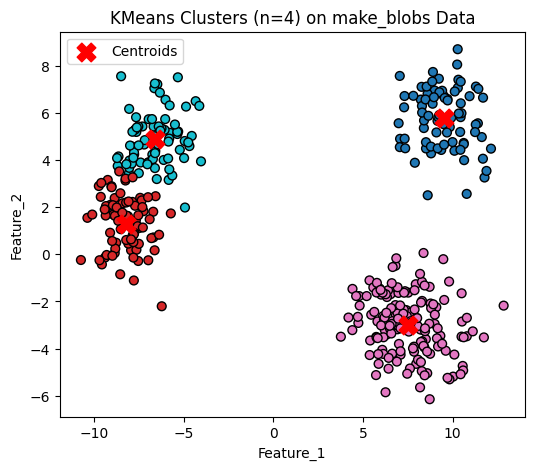

Confusion matrix (rows=true, cols=predicted):
 [[ 0  0 80  0  0]
 [ 0  4  0 76  0]
 [80  0  0  0  0]
 [ 0  0 80  0  0]
 [ 0 77  0  3  0]]


In [ ]:
kmeans_blobs = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster'] = kmeans_blobs.fit_predict(df[['Feature_1', 'Feature_2']])

print("Inertia (within-cluster sum of squares):", kmeans_blobs.inertia_)
print("Cluster centers:")
print(kmeans_blobs.cluster_centers_)

plt.figure(figsize=(6,5))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['cluster'], cmap='tab10', s=40, edgecolor='k')
centers = kmeans_blobs.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=180, marker='X', label='Centroids')
plt.title('KMeans Clusters (n=4) on make_blobs Data')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, df['cluster'])
print("Confusion matrix (rows=true, cols=predicted):\n", cm)

In [11]:
# Step 4: Initialize and fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

print("K-Means fitted. Inertia (sum of squared distances to centroids):", kmeans.inertia_)

K-Means fitted. Inertia (sum of squared distances to centroids): 1343.8530566958566


Inertia (within-cluster sum of squares): 1026.1382658072098
Cluster centers:
 [[ 9.49182359  5.75846621]
 [-8.23810043  1.31191356]
 [ 9.07790521 -3.50949272]
 [-6.61071177  4.90285755]
 [ 6.44020105 -2.6216262 ]]


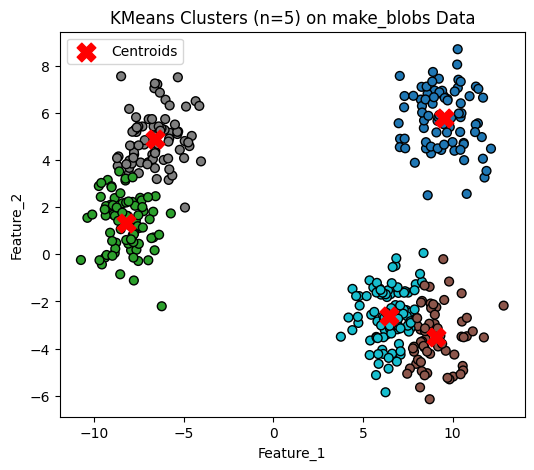

Confusion matrix (rows=true, cols=predicted):
 [[ 0  0 57  0 23]
 [ 0  4  0 76  0]
 [80  0  0  0  0]
 [ 0  0  8  0 72]
 [ 0 77  0  3  0]]
Adjusted Rand Index: 0.801
Silhouette Score: 0.508


In [ ]:
kmeans_blobs = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['cluster'] = kmeans_blobs.fit_predict(df[['Feature_1', 'Feature_2']])

print("Inertia (within-cluster sum of squares):", kmeans_blobs.inertia_)
print("Cluster centers:\n", kmeans_blobs.cluster_centers_)

plt.figure(figsize=(6,5))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['cluster'], cmap='tab10', s=40, edgecolor='k')
centers = kmeans_blobs.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=180, marker='X', label='Centroids')
plt.title('KMeans Clusters (n=5) on make_blobs Data')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, adjusted_rand_score, silhouette_score
cm = confusion_matrix(y, df['cluster'])
ari = adjusted_rand_score(y, df['cluster'])
sil = silhouette_score(df[['Feature_1','Feature_2']], df['cluster'])
print("Confusion matrix (rows=true, cols=predicted):\n", cm)
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {sil:.3f}")

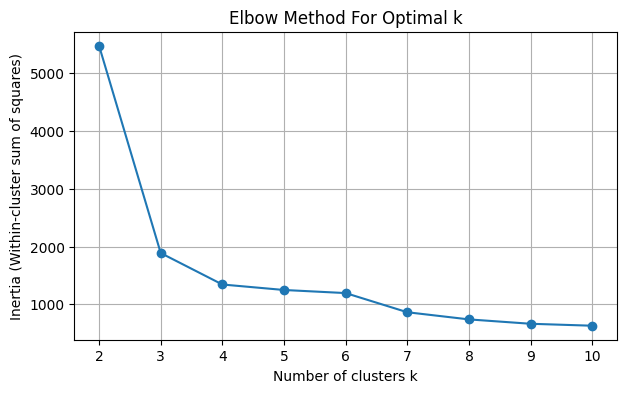

In [ ]:
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Feature_1', 'Feature_2']])
    inertias.append(km.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(list(K_range), inertias, marker='o')
plt.xticks(list(K_range))
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

**centers** sets how many cluster groups are created in the dataset. **cluster_std** controls how spread out each group is. More centers means more clusters; a small cluster_std makes clusters tight and easy to separate, while a large cluster_std makes them overlap and harder to distinguish.